<a href="https://colab.research.google.com/github/chevvakavitha/Predicting-Heart-Disease/blob/main/Predicting_Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries and Dataset


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler



In [ ]:
# Load the dataset
heart_data = pd.read_csv('heart.csv')

In [ ]:
# Display the first few rows
print(heart_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


1. Data Analysis

In [ ]:
# Basic Information about Dataset
print(heart_data.info())
print(heart_data.describe())  # Mean, Min, Max, Quartiles


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [ ]:
# Correlation between all fields
correlation = heart_data.corr()
print(correlation)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

2. Data Visualization

<ipython-input-6-f040cc1eb1fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='coolwarm')


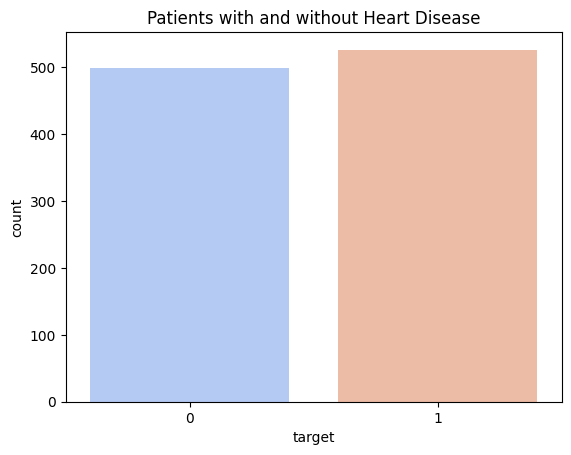

In [ ]:
# Visualize the number of patients with and without heart disease
sns.countplot(x='target', data=heart_data, palette='coolwarm')
plt.title("Patients with and without Heart Disease")
plt.show()

<ipython-input-7-55cd70dc8dc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=heart_data, palette='coolwarm')


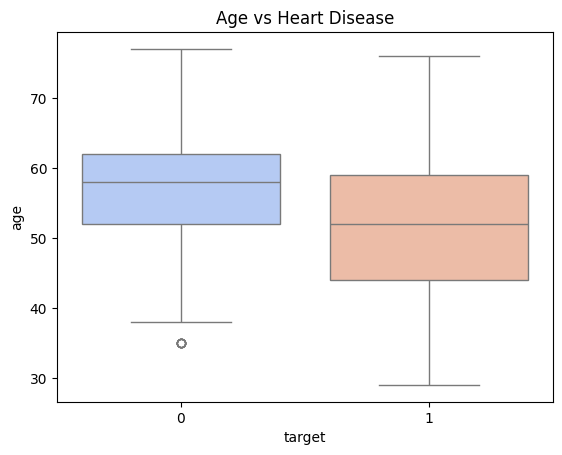

In [ ]:
# Visualize age distribution for patients with and without heart disease
sns.boxplot(x='target', y='age', data=heart_data, palette='coolwarm')
plt.title("Age vs Heart Disease")
plt.show()

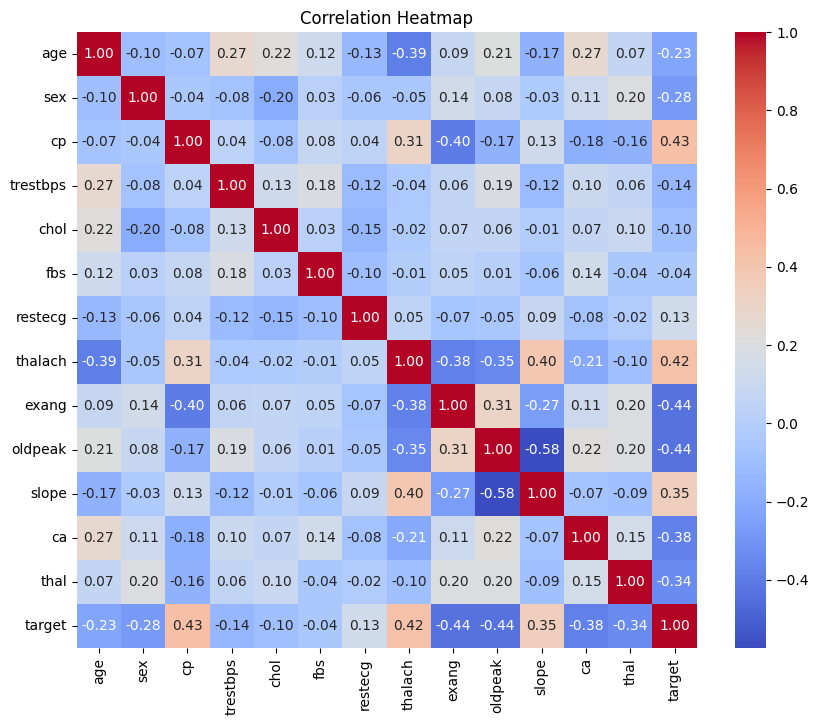

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

3. Logistic Regression

In [ ]:
# Data Preprocessing
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [ ]:
# Train-Test Split (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [ ]:
# Confusion Matrix and Accuracy
conf_matrix_log = confusion_matrix(y_test, y_pred)
accuracy_log = accuracy_score(y_test, y_pred)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log)
print("Logistic Regression Accuracy:", accuracy_log)

Logistic Regression Confusion Matrix:
 [[119  40]
 [ 20 129]]
Logistic Regression Accuracy: 0.8051948051948052


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



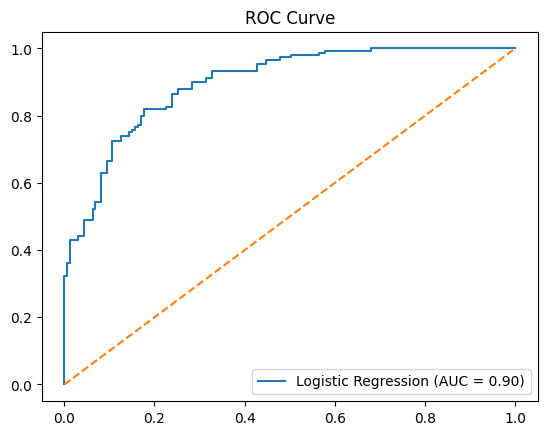

In [ ]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.legend()
plt.show()

4. Decision Tree

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Confusion Matrix and Accuracy
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Confusion Matrix:
 [[159   0]
 [  9 140]]
Decision Tree Accuracy: 0.9707792207792207


In [ ]:
# Visualize Decision Tree
print(export_text(dt_model, feature_names=list(X.columns)))


|--- cp <= -0.45
|   |--- ca <= -0.26
|   |   |--- thal <= 0.28
|   |   |   |--- thalach <= -1.35
|   |   |   |   |--- class: 0
|   |   |   |--- thalach >  -1.35
|   |   |   |   |--- exang <= 0.35
|   |   |   |   |   |--- chol <= 1.49
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  1.49
|   |   |   |   |   |   |--- trestbps <= 0.18
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- trestbps >  0.18
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- exang >  0.35
|   |   |   |   |   |--- thalach <= -0.18
|   |   |   |   |   |   |--- trestbps <= -0.96
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- trestbps >  -0.96
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- thalach >  -0.18
|   |   |   |   |   |   |--- thal <= -2.18
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- thal >  -2.18
|   |   |   |   |   |   |   |--- oldpeak <= -0.02
|   |   |   |   |   |   |   |   |--- c

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



5. Random Forest

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Confusion Matrix and Accuracy
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Confusion Matrix:
 [[159   0]
 [  6 143]]
Random Forest Accuracy: 0.9805194805194806


<ipython-input-22-77c6c7482ab2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette='coolwarm')


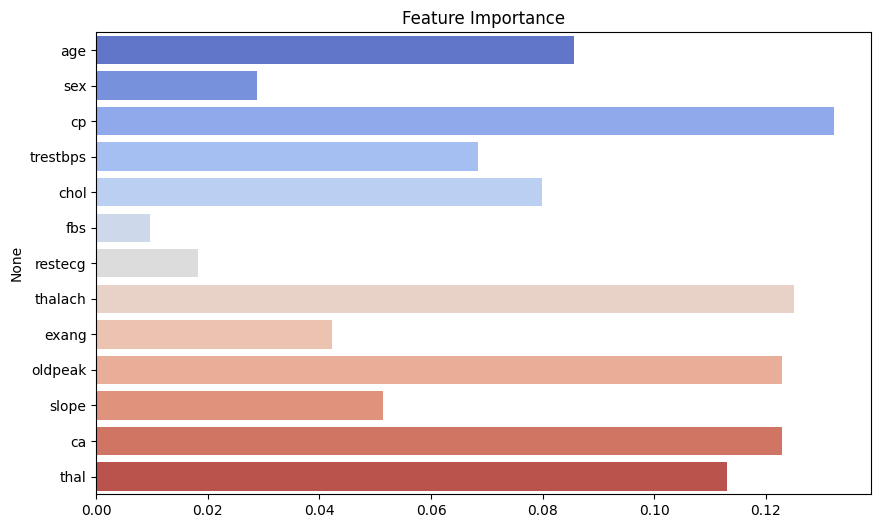

In [ ]:
# Feature Importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns, palette='coolwarm')
plt.title("Feature Importance")
plt.show()

6. Model Comparison and Advanced Visualizations

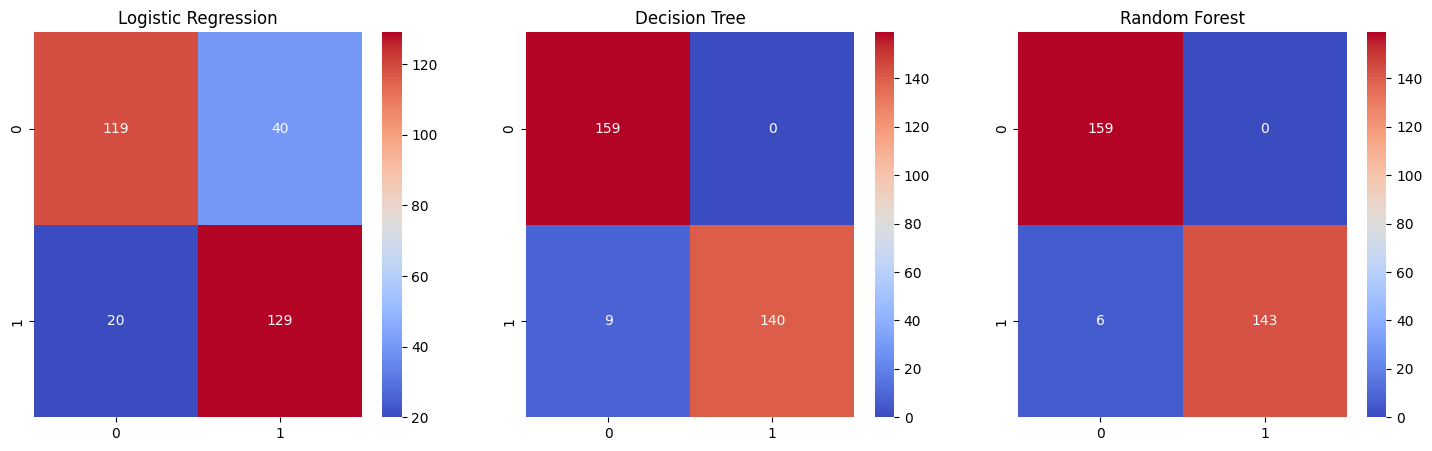

In [ ]:
# Confusion Matrix Heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap='coolwarm', ax=axes[0])
axes[0].set_title("Logistic Regression")
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap='coolwarm', ax=axes[1])
axes[1].set_title("Decision Tree")
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='coolwarm', ax=axes[2])
axes[2].set_title("Random Forest")
plt.show()

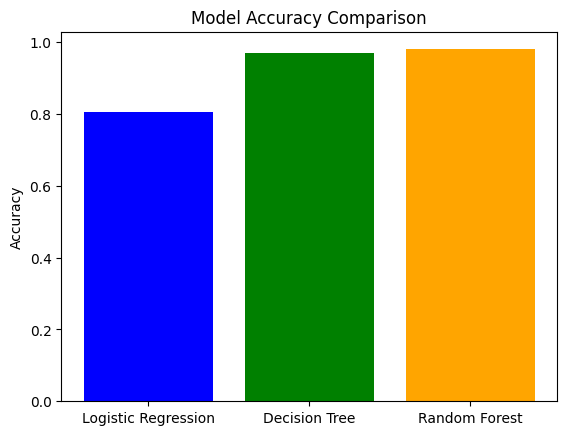

In [ ]:
# Model Comparison Metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_log, accuracy_dt, accuracy_rf]
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

Advanced Feature Engineering and Exploratory Data Analysis

In [ ]:
# Outlier Detection and Handling
# Outlier Detection using Z-score
from scipy.stats import zscore

heart_data['zscore_age'] = zscore(heart_data['age'])
outliers = heart_data[(heart_data['zscore_age'] > 3) | (heart_data['zscore_age'] < -3)]
print(f"Outliers in 'age':\n{outliers[['age', 'zscore_age']]}")

Outliers in 'age':
Empty DataFrame
Columns: [age, zscore_age]
Index: []


In [ ]:
# Handling Outliers: Replace them with median
heart_data['age'] = np.where(
    (heart_data['zscore_age'] > 3) | (heart_data['zscore_age'] < -3),
    heart_data['age'].median(),
    heart_data['age']
)

Feature Engineering

In [ ]:
# Create a new feature: Age Group
bins = [0, 35, 50, 65, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
heart_data['age_group'] = pd.cut(heart_data['age'], bins=bins, labels=labels)

In [ ]:
# Encoding categorical features for analysis
heart_data_encoded = pd.get_dummies(heart_data, columns=['age_group', 'sex', 'cp', 'slope'], drop_first=True)

Clustering Using KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(heart_data_encoded.drop('target', axis=1))

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
heart_data['Cluster'] = kmeans.fit_predict(pca_features)

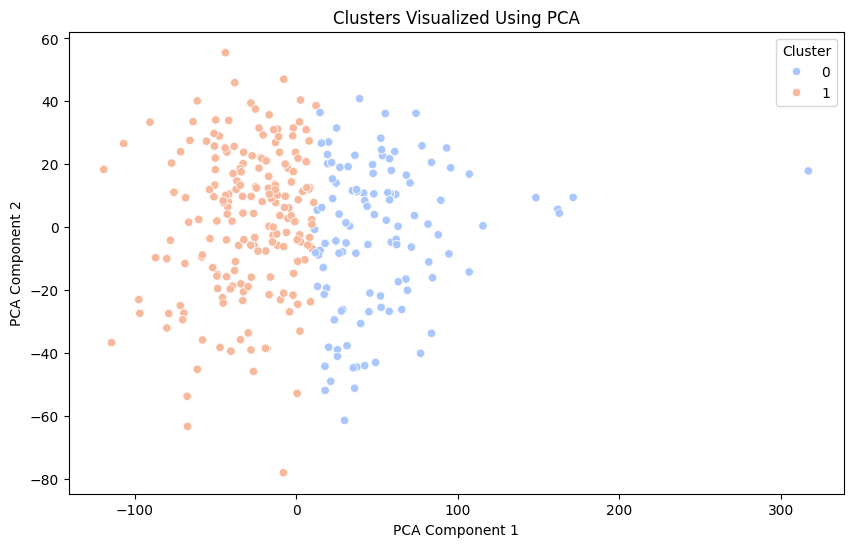

In [ ]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=heart_data['Cluster'], palette='coolwarm')
plt.title("Clusters Visualized Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Explainability Using SHAP for Model Insights

In [ ]:
# Train a Random Forest Classifier
rf_model_shap = RandomForestClassifier(n_estimators=100, random_state=42)
#Drop 'target' and 'Cluster' from heart_data instead of heart_data_encoded
X = heart_data.drop(['target', 'Cluster'], axis=1)
#Get dummies for categorical features in X
X = pd.get_dummies(X, columns=['age_group', 'sex', 'cp', 'slope'], drop_first=True)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model_shap.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Explain predictions with SHAP
explainer = shap.TreeExplainer(rf_model_shap)
shap_values = explainer.shap_values(X_test)


Cross-Validation with Hyperparameter Tuning
python
Copy code


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model_shap, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Accuracy of the Best Model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Accuracy of Optimized Random Forest:", accuracy_score(y_test, y_pred_best_rf))

Accuracy of Optimized Random Forest: 0.9707792207792207


Visualization of Important Age Group Insights

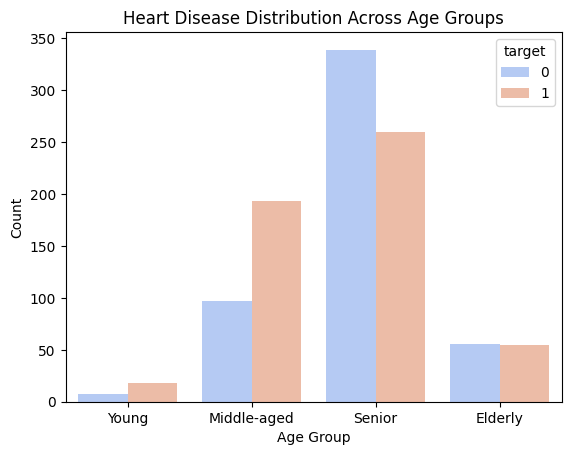

In [ ]:
# Analyze the distribution of age groups among patients with heart disease
sns.countplot(x='age_group', hue='target', data=heart_data, palette='coolwarm')
plt.title("Heart Disease Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

Time-Series Simulation Analysis (Bonus)

In [ ]:
# Simulate a time-series dataset for heart patients
heart_data['visit_date'] = pd.date_range(start='2022-01-01', periods=len(heart_data), freq='D')

# Aggregate and analyze time-series trends
time_series_data = heart_data.groupby('visit_date').agg({
    'target': 'mean',
    'age': 'mean',
    'thalach': 'mean'
}).reset_index()


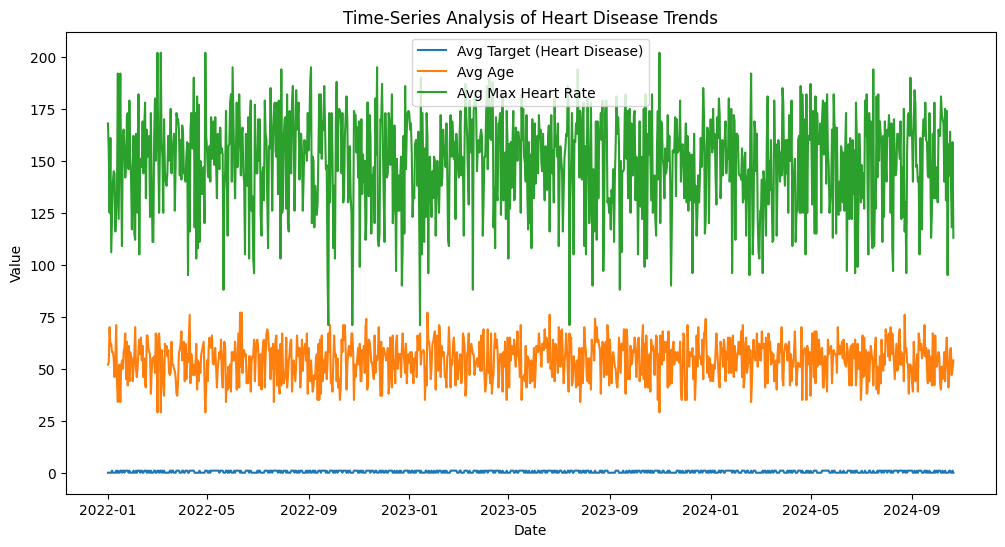

In [ ]:
# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['visit_date'], time_series_data['target'], label='Avg Target (Heart Disease)')
plt.plot(time_series_data['visit_date'], time_series_data['age'], label='Avg Age')
plt.plot(time_series_data['visit_date'], time_series_data['thalach'], label='Avg Max Heart Rate')
plt.legend()
plt.title("Time-Series Analysis of Heart Disease Trends")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


Here’s an additional and advanced code snippet for analyzing the Heart Disease dataset with unique methodologies, including feature engineering, PCA (Principal Component Analysis), clustering, and SHAP for model interpretability.

Advanced Feature Engineering and Exploratory Data Analysis
Outlier Detection and Handling
python
Copy code
# Outlier Detection using Z-score
from scipy.stats import zscore

heart_data['zscore_age'] = zscore(heart_data['age'])
outliers = heart_data[(heart_data['zscore_age'] > 3) | (heart_data['zscore_age'] < -3)]
print(f"Outliers in 'age':\n{outliers[['age', 'zscore_age']]}")

# Handling Outliers: Replace them with median
heart_data['age'] = np.where(
    (heart_data['zscore_age'] > 3) | (heart_data['zscore_age'] < -3),
    heart_data['age'].median(),
    heart_data['age']
)
Feature Engineering
python
Copy code
# Create a new feature: Age Group
bins = [0, 35, 50, 65, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
heart_data['age_group'] = pd.cut(heart_data['age'], bins=bins, labels=labels)

# Encoding categorical features for analysis
heart_data_encoded = pd.get_dummies(heart_data, columns=['age_group', 'sex', 'cp', 'slope'], drop_first=True)
Clustering Using KMeans
python
Copy code
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(heart_data_encoded.drop('target', axis=1))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
heart_data['Cluster'] = kmeans.fit_predict(pca_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=heart_data['Cluster'], palette='coolwarm')
plt.title("Clusters Visualized Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
Explainability Using SHAP for Model Insights
python
Copy code
import shap

# Train a Random Forest Classifier
rf_model_shap = RandomForestClassifier(n_estimators=100, random_state=42)
X = heart_data_encoded.drop(['target', 'Cluster'], axis=1)
y = heart_data_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model_shap.fit(X_train, y_train)

# Explain predictions with SHAP
explainer = shap.TreeExplainer(rf_model_shap)
shap_values = explainer.shap_values(X_test)

# Visualize Feature Importance with SHAP
shap.summary_plot(shap_values[1], X_test)
Cross-Validation with Hyperparameter Tuning
python
Copy code
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model_shap, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Accuracy of the Best Model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Accuracy of Optimized Random Forest:", accuracy_score(y_test, y_pred_best_rf))
Visualization of Important Age Group Insights
python
Copy code
# Analyze the distribution of age groups among patients with heart disease
sns.countplot(x='age_group', hue='target', data=heart_data, palette='coolwarm')
plt.title("Heart Disease Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()
Time-Series Simulation Analysis (Bonus)
python
Copy code
# Simulate a time-series dataset for heart patients
heart_data['visit_date'] = pd.date_range(start='2022-01-01', periods=len(heart_data), freq='D')

# Aggregate and analyze time-series trends
time_series_data = heart_data.groupby('visit_date').agg({
    'target': 'mean',
    'age': 'mean',
    'thalach': 'mean'
}).reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['visit_date'], time_series_data['target'], label='Avg Target (Heart Disease)')
plt.plot(time_series_data['visit_date'], time_series_data['age'], label='Avg Age')
plt.plot(time_series_data['visit_date'], time_series_data['thalach'], label='Avg Max Heart Rate')
plt.legend()
plt.title("Time-Series Analysis of Heart Disease Trends")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
New Model Comparison